---
### Instalation et Import

https://github.com/ta-lib/ta-lib-python

In [ ]:
# Instalation de la librairie TALIB
# Si erreur sur macos d'abord faire => ' brew install ta-lib'

#!pip install TA-Lib

# ou via conda 
#conda install -c conda-forge ta-lib

In [1]:
# Import des librairies
import pandas as pd
import talib as ta

---
### Lecture des données

In [2]:
# Lecture des données
file_path = 'data.csv'  # Exemple: 'path_to_your_file.csv'
df = pd.read_csv(file_path)

# Definit close_time comme index
df['close_time'] = pd.to_datetime(df['close_time'])
df.set_index('close_time', inplace=True)

In [3]:
# Affichage des premières lignes pour s'assurer que les données sont correctes
df.head()

,open,high,low,close,volume,dv,num_trades,taker_buy_vol,taker_buy_dv
close_time,,,,,,,,,
2024-03-01 04:00:00,61130.99,61749.00,60777.00,61105.91,6345.57641,3.883900e+08,243343.0,3207.82212,1.963594e+08
2024-03-01 08:00:00,61105.92,61772.82,61061.11,61434.00,5719.40504,3.515761e+08,265072.0,2862.63224,1.759705e+08
2024-03-01 12:00:00,61434.00,62243.53,61316.67,61863.72,8452.27991,5.238901e+08,322392.0,4193.92185,2.599266e+08
2024-03-01 16:00:00,61863.71,62677.06,61131.01,61263.99,9971.27905,6.188431e+08,479317.0,4952.55698,3.074801e+08
2024-03-01 20:00:00,61263.98,62494.31,61234.00,62215.50,7886.35574,4.878967e+08,293264.0,4067.64118,2.516468e+08


---
### Creation des indicateurs

In [4]:
# Moyenne mobile simple (SMA)
df['SMA_50'] = ta.SMA(df['close'], timeperiod=50)

# Relative Strength Index (RSI)
df['RSI_14'] = ta.RSI(df['close'], timeperiod=14)

# Bandes de Bollinger
df['Upper_Band'], df['Middle_Band'], df['Lower_Band'] = ta.BBANDS(df['close'], timeperiod=50, nbdevup=2, nbdevdn=3, matype=0)

#Suppression des valeurs nan (cause des fenetres glissantes)
df.dropna(inplace=True)

<Axes: title={'center': 'RSI'}, xlabel='close_time'>

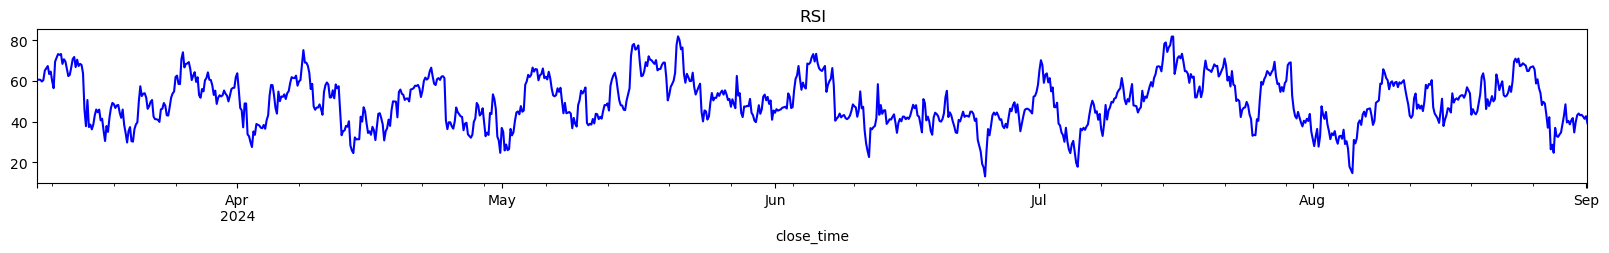

In [5]:
df.RSI_14.plot(figsize=(20, 2), title='RSI', color='blue')

In [6]:
df.head()

,open,high,low,close,volume,dv,num_trades,taker_buy_vol,taker_buy_dv,SMA_50,RSI_14,Upper_Band,Middle_Band,Lower_Band
close_time,,,,,,,,,,,,,,
2024-03-09 08:00:00,68247.34,68541.10,68133.27,68288.64,3391.79959,2.317441e+08,207939.0,1905.62209,1.302003e+08,64876.8776,60.599090,70006.391628,64876.8776,57182.606559
2024-03-09 12:00:00,68288.64,68453.12,67933.93,68299.99,4166.26410,2.842951e+08,257863.0,1976.60442,1.348777e+08,65020.7592,60.654744,70122.612456,65020.7592,57367.979316
2024-03-09 16:00:00,68300.00,68521.10,68100.01,68288.20,3154.11941,2.154449e+08,240479.0,1605.75555,1.096866e+08,65157.8432,60.559052,70235.110652,65157.8432,57541.942021
2024-03-09 20:00:00,68288.19,68325.00,68000.00,68193.51,3079.82488,2.099566e+08,251924.0,1393.28998,9.498278e+07,65284.4390,59.743826,70342.468341,65284.4390,57697.394988
2024-03-10 00:00:00,68193.51,68433.17,68193.51,68313.27,2104.46081,1.438150e+08,166920.0,1009.36330,6.897841e+07,65425.4246,60.468651,70419.915327,65425.4246,57933.688509


- Liste des indicateurs et syntaxes disponibles : 
https://ta-lib.github.io/ta-lib-python/funcs.html

---
### Creation d'une stratégie :  
Stratégie de Mean Reversion en utilisant les bandes de Bollinger

In [7]:
# Initialise la colonne 'Signal' à 0
df['Signal'] = 0

# Générer un signal d'achat (1) lorsque le prix de clôture est inférieur à la bande inférieure
df.loc[df['close'] < df['Lower_Band'], 'Signal'] = 1

# Générer un signal de vente (-1) lorsque le prix de clôture est supérieur à la bande supérieure
df.loc[df['close'] > df['Upper_Band'], 'Signal'] = -1

In [8]:
df.head()

,open,high,low,close,volume,dv,num_trades,taker_buy_vol,taker_buy_dv,SMA_50,RSI_14,Upper_Band,Middle_Band,Lower_Band,Signal
close_time,,,,,,,,,,,,,,,
2024-03-09 08:00:00,68247.34,68541.10,68133.27,68288.64,3391.79959,2.317441e+08,207939.0,1905.62209,1.302003e+08,64876.8776,60.599090,70006.391628,64876.8776,57182.606559,0
2024-03-09 12:00:00,68288.64,68453.12,67933.93,68299.99,4166.26410,2.842951e+08,257863.0,1976.60442,1.348777e+08,65020.7592,60.654744,70122.612456,65020.7592,57367.979316,0
2024-03-09 16:00:00,68300.00,68521.10,68100.01,68288.20,3154.11941,2.154449e+08,240479.0,1605.75555,1.096866e+08,65157.8432,60.559052,70235.110652,65157.8432,57541.942021,0
2024-03-09 20:00:00,68288.19,68325.00,68000.00,68193.51,3079.82488,2.099566e+08,251924.0,1393.28998,9.498278e+07,65284.4390,59.743826,70342.468341,65284.4390,57697.394988,0
2024-03-10 00:00:00,68193.51,68433.17,68193.51,68313.27,2104.46081,1.438150e+08,166920.0,1009.36330,6.897841e+07,65425.4246,60.468651,70419.915327,65425.4246,57933.688509,0


<Axes: >

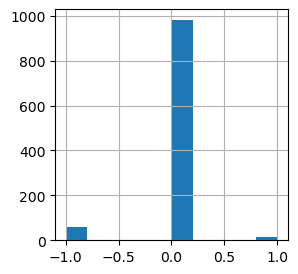

In [9]:
# Prendre l'habitude d'un contrôle visuel rapide de la distribution
df.Signal.hist(figsize=(3, 3))

---
### Affichage interactif avec plotly

In [10]:
# Installation de plotly
#!pip install plotly

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [12]:
# Créer une figure avec 3 lignes (Prix, volume, RSI)
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                    row_heights=[0.6, 0.2, 0.2],  # Ajuster les proportions de hauteur pour chaque sous-graphique
                    vertical_spacing=0.05)        # Espacement entre les graphiques

# Ajouter le graphique en bougies dans la première ligne
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['open'],
                             high=df['high'],
                             low=df['low'],
                             close=df['close'],
                             name='Prices'), row=1, col=1)

# Ajouter les bandes de Bollinger (supérieure et inférieure) dans la première ligne
fig.add_trace(go.Scatter(x=df.index, y=df['Upper_Band'], mode='lines', name='Bande Supérieure', line=dict(color='green')), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['Lower_Band'], mode='lines', name='Bande Inférieure', line=dict(color='red')), row=1, col=1)

# Ajouter les signaux d'achat et de vente
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]

fig.add_trace(go.Scatter(x=buy_signals.index, y=buy_signals['close'], mode='markers', name='Buy Signal', 
                         marker=dict(symbol='triangle-up', color='lime', size=10)), row=1, col=1)

fig.add_trace(go.Scatter(x=sell_signals.index, y=sell_signals['close'], mode='markers', name='Sell Signal', 
                         marker=dict(symbol='triangle-down', color='red', size=10)), row=1, col=1)

# Ajouter le volume dans la deuxième ligne
fig.add_trace(go.Bar(x=df.index, y=df['volume'], name='Volume', marker_color='orange'), row=2, col=1)

# Ajouter le RSI dans la troisième ligne
fig.add_trace(go.Scatter(x=df.index, y=df['RSI_14'], mode='lines', name='RSI', line=dict(color='blue')), row=3, col=1)


# Personnaliser la mise en page pour le thème sombre
fig.update_layout(
    title="Graphique Interactif",
    xaxis_title="Date",
    yaxis_title="Prix",
    template='plotly_dark',  # Thème sombre
    xaxis_rangeslider_visible=False,  # Cacher le sélecteur de plage si non nécessaire
    width=1500,  # Définir la largeur de la figure
    height=900   # Définir la hauteur de la figure
)

fig.show()